In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [20]:
def black_color_func(word, font_size, position, orientation, random_state=None,
                     **kwargs):
    return "rgb(0, 0, 0)"

disc_mask = np.array(Image.open("blackdisc.jpeg"))

wc = WordCloud(font_path='OCR-A-Std-Regular.ttf',
               prefer_horizontal=1.0,
               background_color="white",
               mask=disc_mask,
               color_func=black_color_func)

In [16]:
subreddit_name = 'The_Donald'

In [17]:
# Remember, X = WH
# W = document - latent
# H = latent - term

#data = pd.read_csv('data/bigquery/{}.csv'.format(subreddit_name))
H = np.load('results/{}/H_{}.npy'.format(subreddit_name, subreddit_name))
W = np.load('results/{}/W_{}.npy'.format(subreddit_name, subreddit_name))
feature_names = np.load(
    'results/{}/feature_names_{}.npy'.format(subreddit_name, subreddit_name))

In [18]:
classifs = W.argmax(axis=1)
tot_comments = W.shape[0]

mat = np.zeros([H.shape[0]])
for i in range(H.shape[0]):
    mat[i] = sum(classifs == i) / tot_comments

df = pd.DataFrame(data=np.atleast_2d(mat),
                  index=[subreddit_name],
                  columns=['Cluster {}'.format(i) for i in range(H.shape[0])])

Cluster 0:


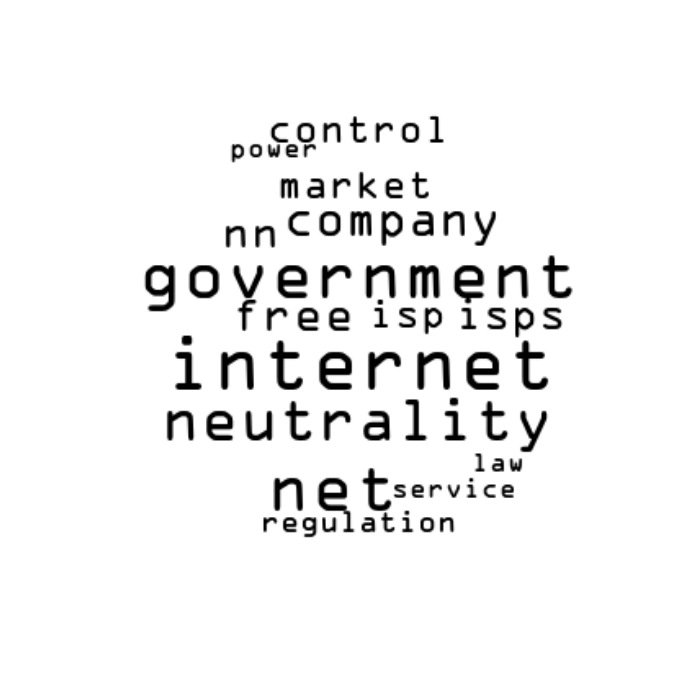

Cluster 1:


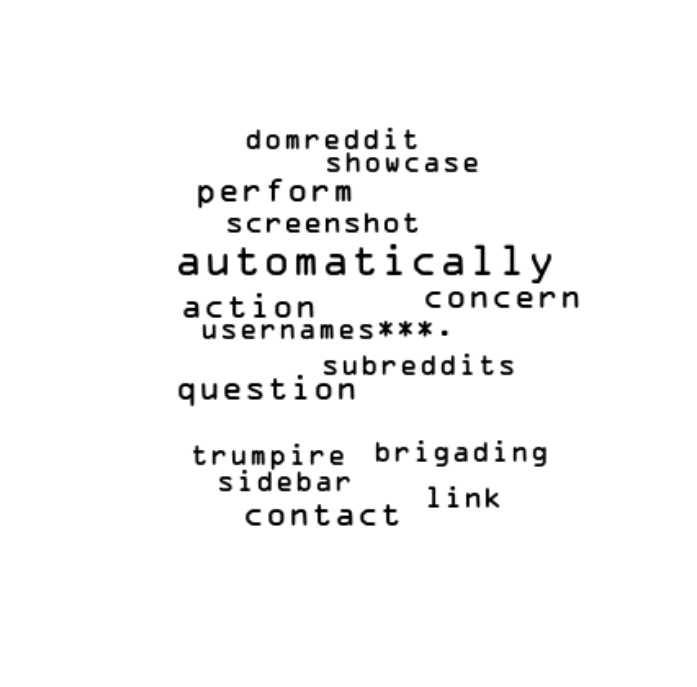

Cluster 2:


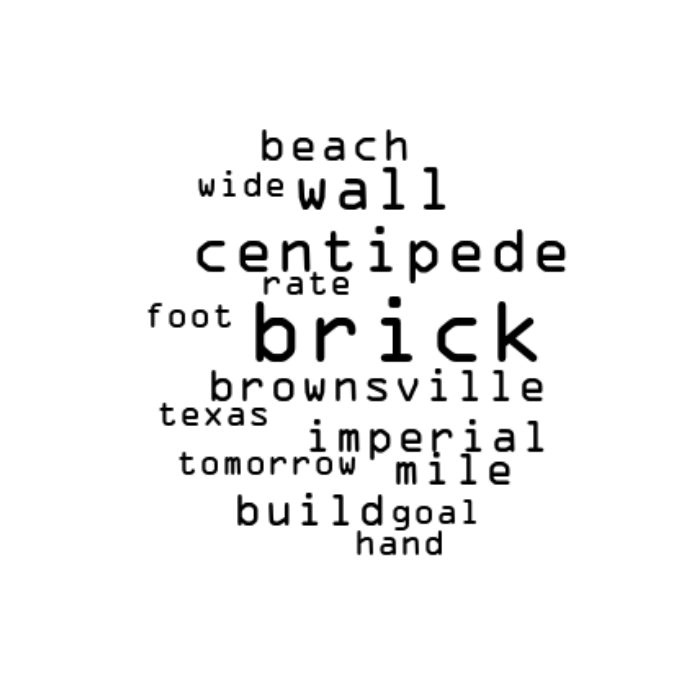

Cluster 3:


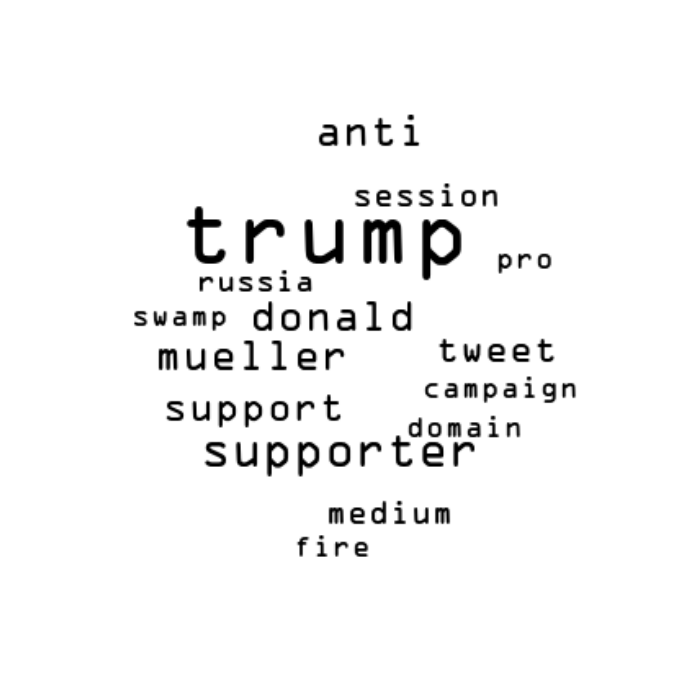

Cluster 4:


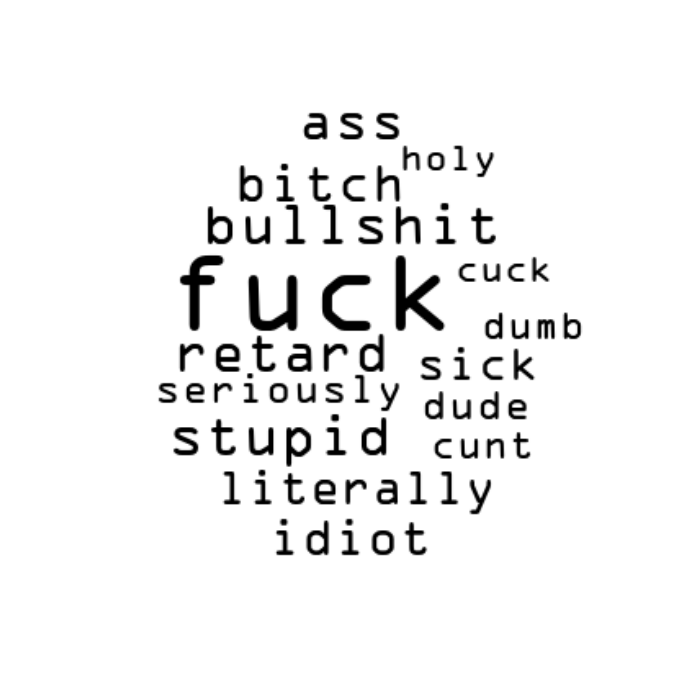

Cluster 5:


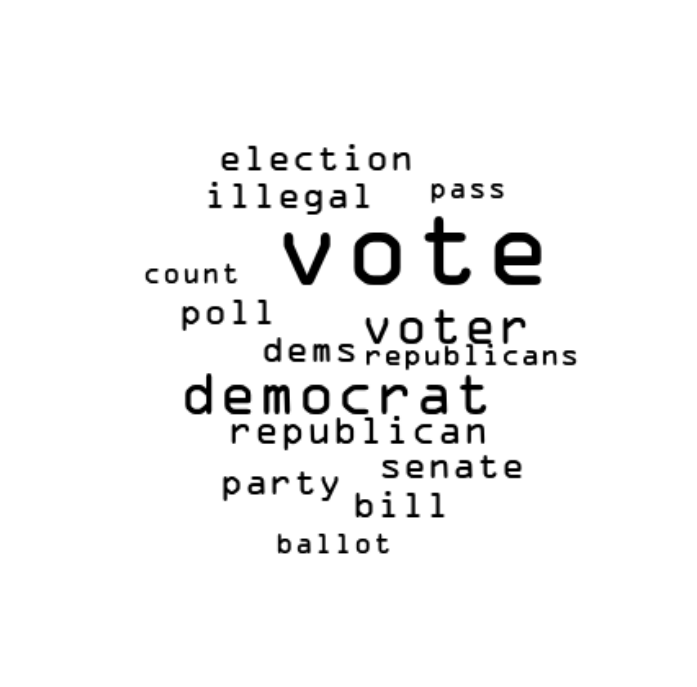

Cluster 6:


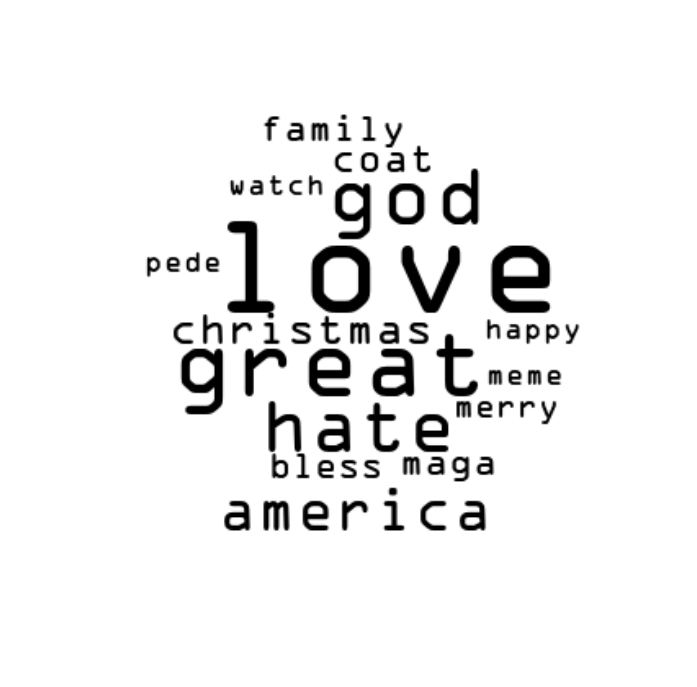

Cluster 7:


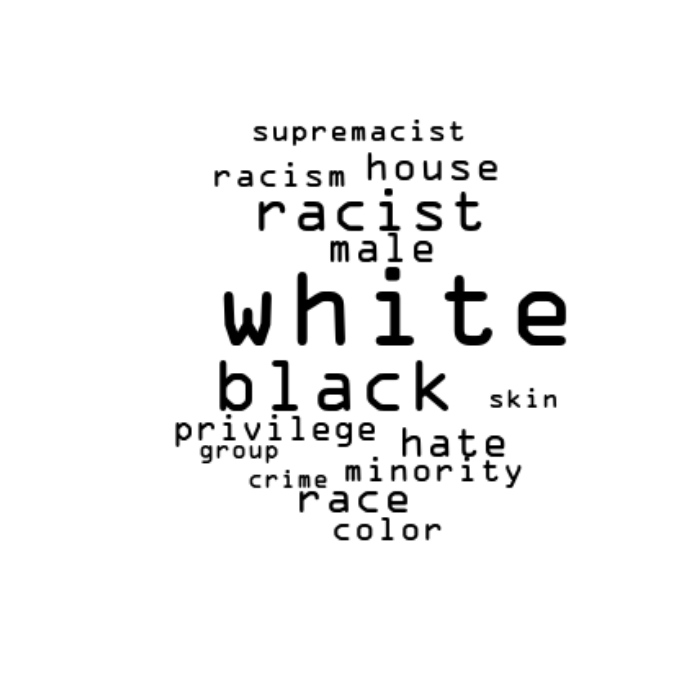

Cluster 8:


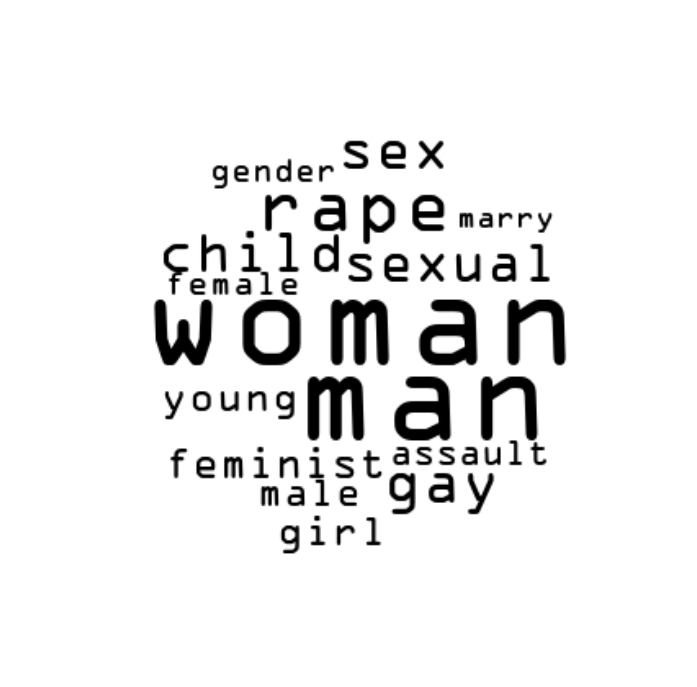

Cluster 9:


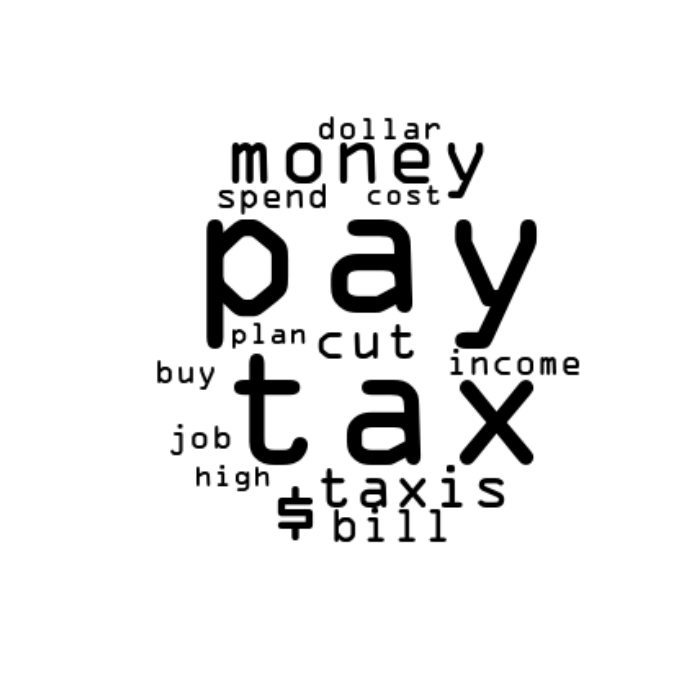

Cluster 10:


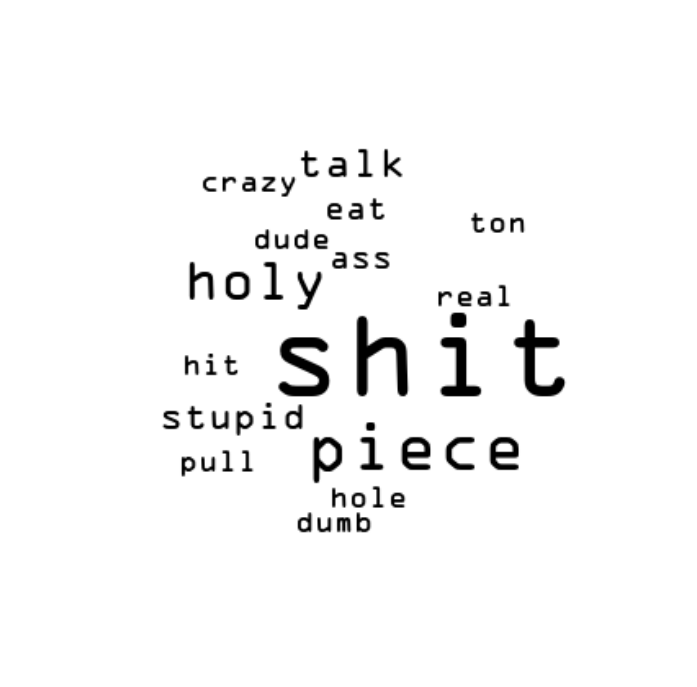

Cluster 11:


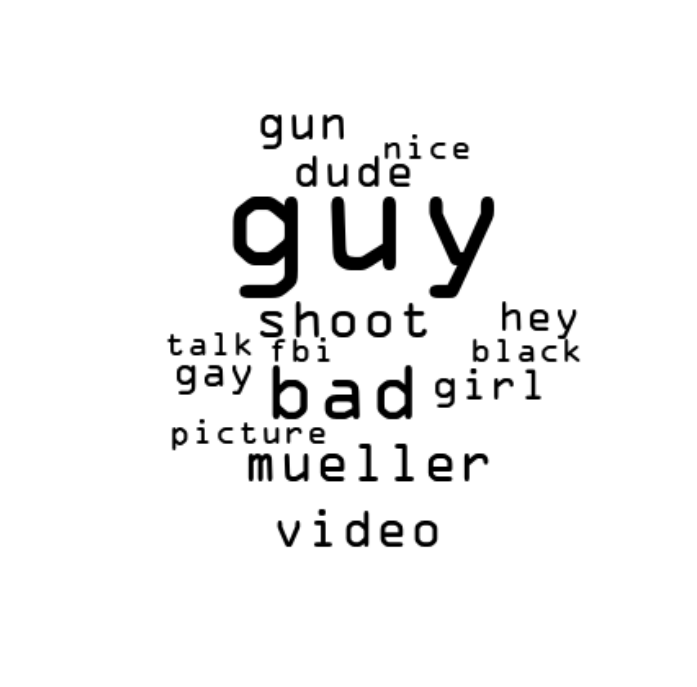

Cluster 12:


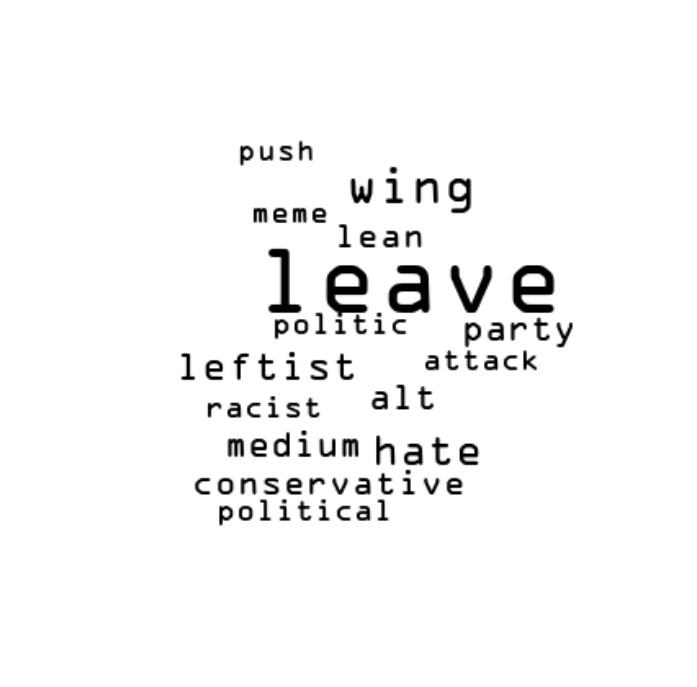

Cluster 13:


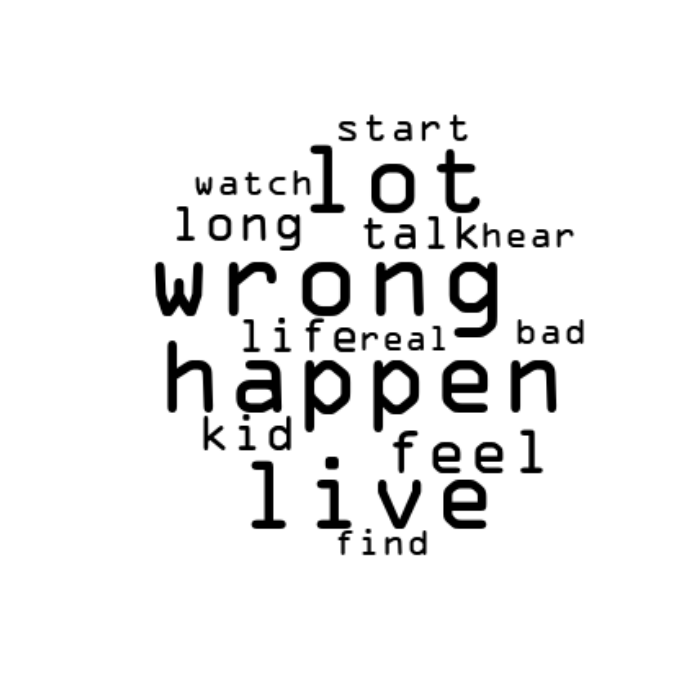

Cluster 14:


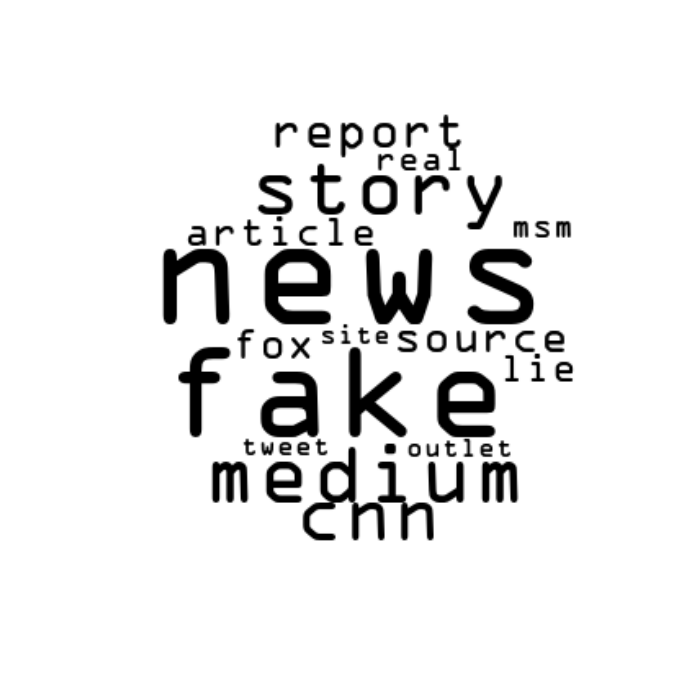

Cluster 15:


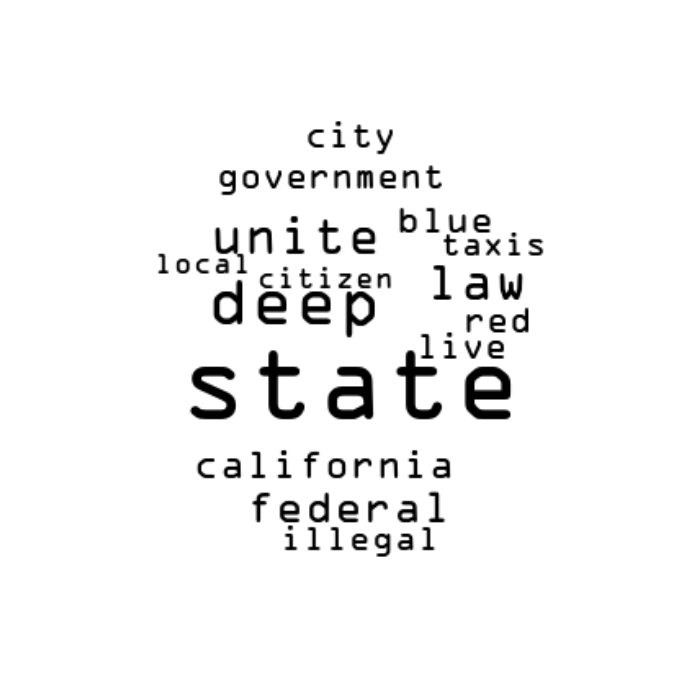

Cluster 16:


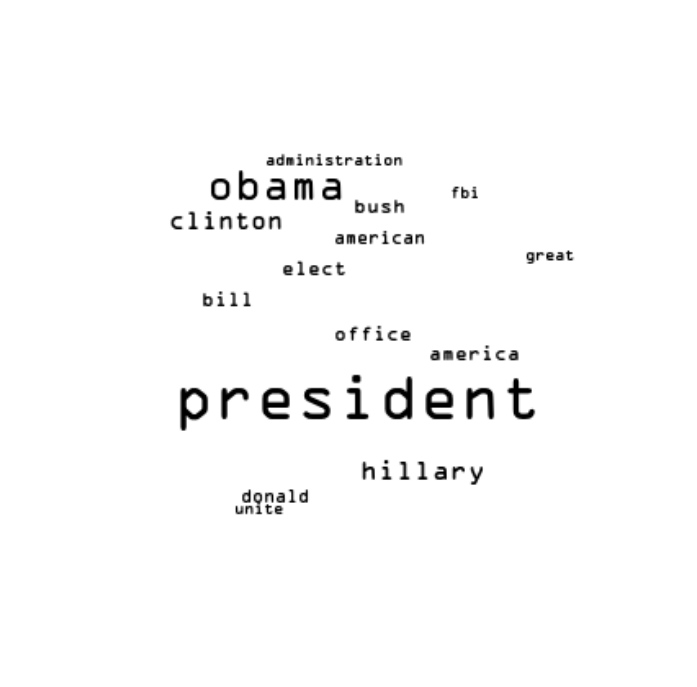

Cluster 17:


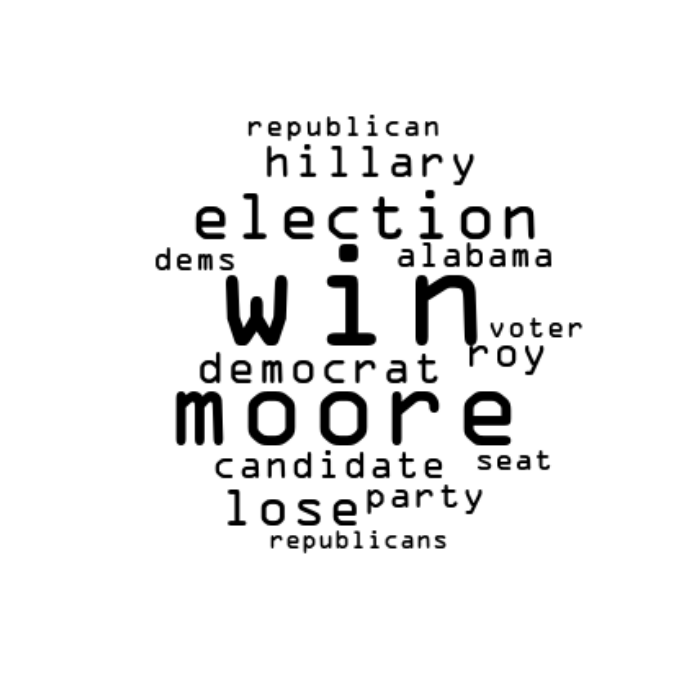

Cluster 18:


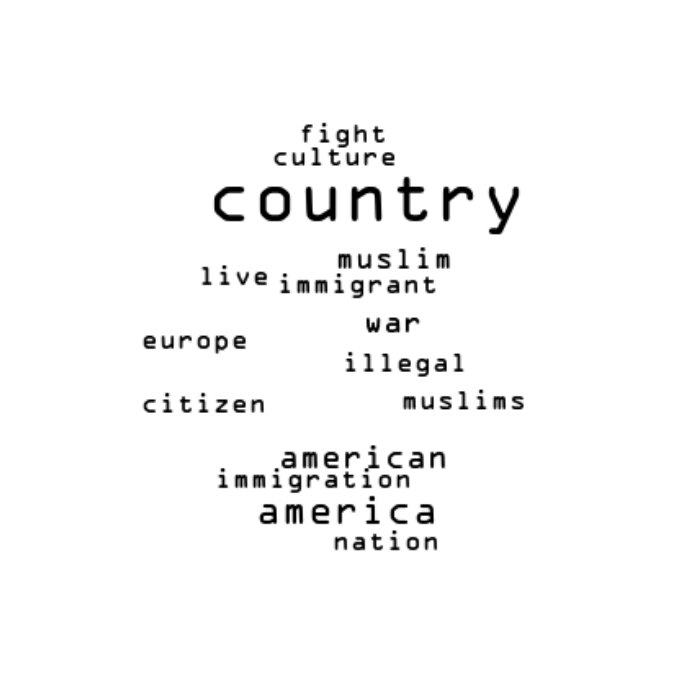

Cluster 19:


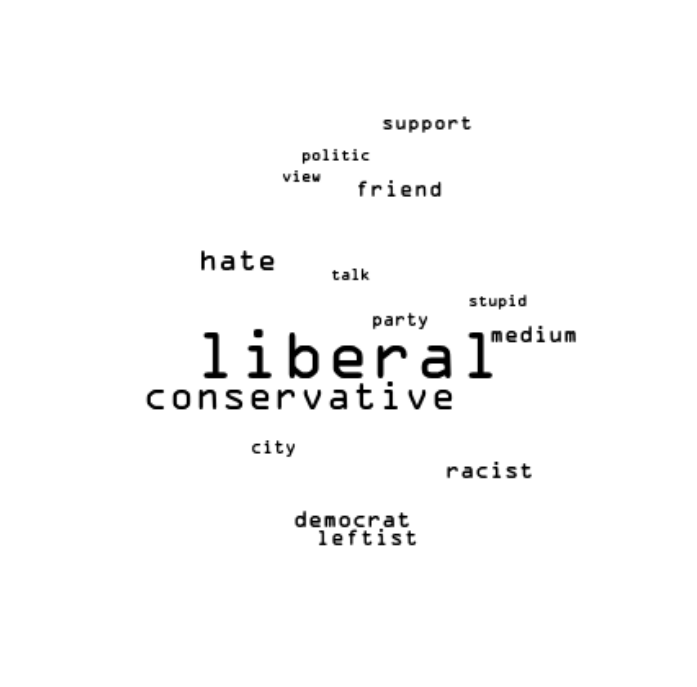

In [21]:
for topic_idx, topic in enumerate(H):
    print("Cluster {}:".format(topic_idx))
    
    d = {}
    for word_idx in topic.argsort()[:-15-1:-1]:
        d[feature_names[word_idx]] = topic[word_idx]
    
    wc.generate_from_frequencies(d)
    plt.subplots(figsize=[12, 12])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.savefig('results/{}/{:0.2f}%.png'.format(subreddit_name,
                                                 100*df.loc[subreddit_name, 'Cluster {}'.format(topic_idx)]))
    plt.show()